# Review Summarization

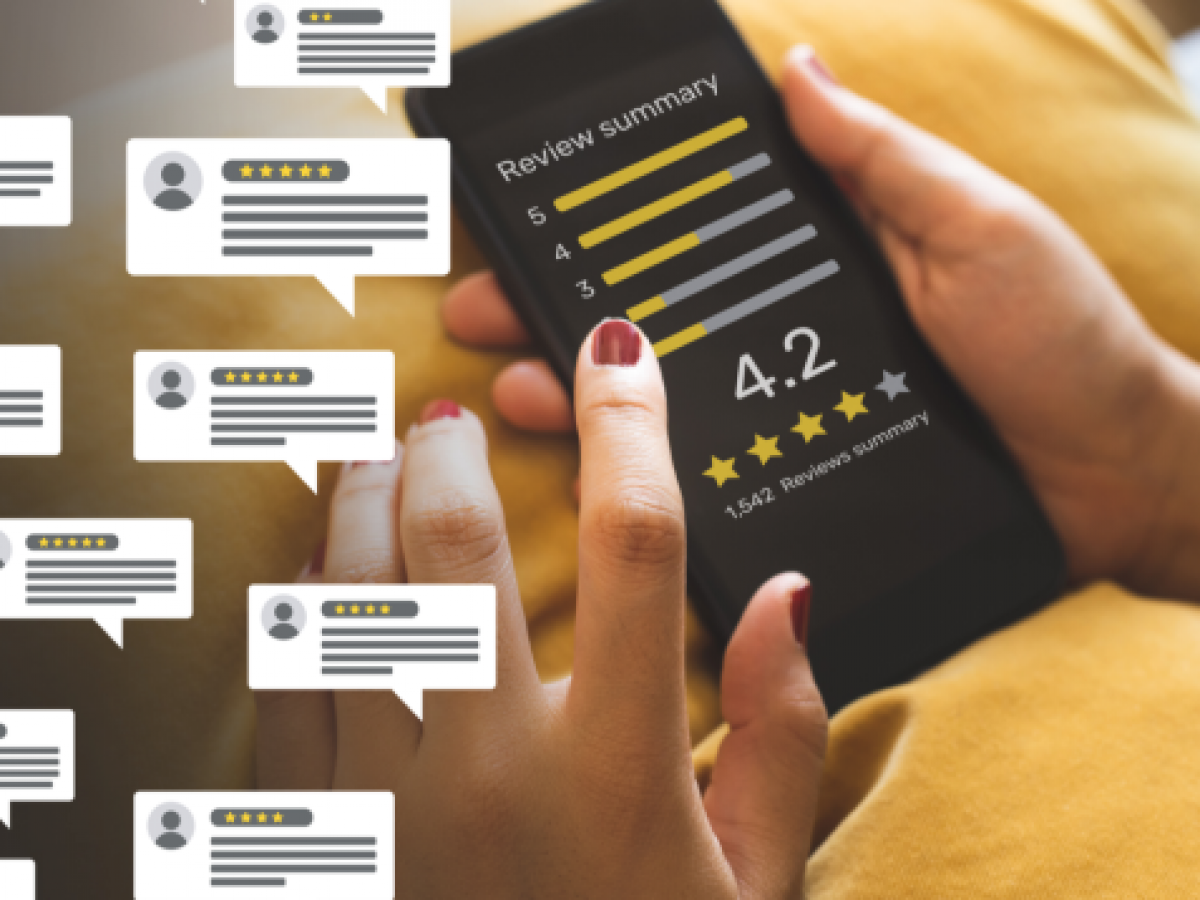
Anggota Kelompok :

* Evan Christopher 202000187
* Grace Melissa Khoe Ping Ing 201900638
* Noel Christevent Mandak 202000436

## Rumusan Masalah:
Untuk mengetahui apa yang perlu ditingkatkan dan apa yang sudah baik dari kinerja seorang dosen, SAS melakukan Evaluasi Kinerja Dosen oleh Mahasiswa (EKDM) dengan menggunakan survei numerik dan isian kepada mahasiswa CIT. Jawaban pada bagian isian menjadi hal yang sangat diperhatikan dosen, namun jumlah review yang cukup banyak membutuhkan waktu yang cukup lama untuk membacanya secara keseluruhan. Oleh karena itu, kami berupaya untuk mengatasi permasalahan tersebut dengan membuat model text summarization. Sayangnya, karena keterbatasan hak akses terhadap data EKDM, kami mencoba mensimulasikan pengujian pada guest review kepada berbagai hotel. Kami mengambil review dari hotel-hotel yang ada di Bali sebab Bali memiliki jumlah hotel yang sangat banyak serta mendapatkan pengunjung dari berbagai negeri.

## Sumber data:
Sumber data: Kami mengambil 100 review pertama dari 100 hotel/resort/homestay di Bali dari website Agoda.

 

## Cara memperoleh data: 
Cara memperoleh data: Kami menggunakan Data Miner Chrome Extension untuk melakukan scraping data review di Agoda.
 
## Jenis Model NLP: 
Kami akan mencoba menggunakan Bert/Transformer/T5.

# Preprocessing Data Hasil Scrapping


### Import Library


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 855.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=a2520cdeb541da9476221f04abadff11e7f3ec7d316da065adec14562645b0f0
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans

In [ ]:
import pandas as pd
from googletrans import Translator, LANGUAGES
import os

### Load Data


In [ ]:
cd /content/drive/MyDrive/Tugas/NLP/Proyek UAS

/content/drive/MyDrive/Tugas/NLP/Proyek UAS


In [ ]:
directory = r'hasil mining uas nlp'
data_frames = []
file_name = []

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv'):
        file_name.append(" ".join(filename.split()[2:])[:-4])
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        data_frames.append(df)

In [ ]:
data_frames

[                                              Column 1
 0    A beautiful Balinese hotel with excellent staf...
 1    I really enjoyed staying here.  Good price, cl...
 2    Loved it here, it was in the heart of the acti...
 3    We loved it here, it’s clean, the pools lovely...
 4    We loved it here, it’s clean, the pools lovely...
 ..                                                 ...
 215                                         Nightmare!
 216  Although the facilities are old they are ın a ...
 217  Was a lovely hotel just a shame the rooms are ...
 218  It's an old hotel with run down facilities. Bu...
 219  We were given a room that had a broken latch o...
 
 [220 rows x 1 columns],
                                               Column 1
 0    Nice & clean room.. Good Bathroom with toiletr...
 1    Hotel near to everywhere, the room is clean, r...
 2    Affordable, clean, and really great location i...
 3    Everything about this hotel is awesome. The br...
 4    Ini hotel trakh

In [ ]:
file_name

['Legian Paradiso Hotel',
 'Fame Hotel Sunset Road Kuta',
 'The Grand Bali Nusa Dua Resort',
 'Taman Harum Cottages Hotel',
 'Umadhatu Village Outbound Resort',
 'Delu Villas and Suite Seminyak',
 'Manggar Indonesia Hotel',
 'Royal Pita Maha Hotel',
 'Grand Balisani Suites Hotel',
 'Zia Hotel Kuta',
 'Fourteen Roses Legian Hotel',
 'Kamaniiya Petitenget Seminyak',
 'Kuta Paradiso Hotel',
 'Ohana Hotel Kuta',
 'Abian Harmony Resort Hotel and Spa',
 'Yello Kuta Beachwalk Bali',
 'Mara River Safari Lodge Hotel',
 'Tijili Hotel Benoa',
 'Grand La Walon Hotel',
 'The Gantari Ubud',
 'Bali Breezz Hotel',
 'Legong Keraton Beach Hotel',
 'Padma Resort Ubud',
 'Ring Sameton Resort Hotel',
 'Hotel Terrace at Kuta',
 'Deva Bali Apartment',
 'Le Grande Bali',
 'Bali Tropic Resort and Spa',
 'The Bene Hotel',
 'Wyndham Tamansari Jivva Resort Bali',
 'Papillon Echobeach',
 'J Hotel Kuta',
 'Bintang Bali Resort',
 'Bobocabin Kintamani',
 'The Kayon Jungle Resort Hotel',
 'Daun Bali Seminyak Hotel',
 

## Translate sentence to English and Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

translator=Translator()
def detect_lenguage(text):
    detection = translator.detect(text)
    return LANGUAGES[detection.lang]

def translate_to_en(text):
    try:
        if detect_lenguage(text)!='english':
            result = translator.translate(text,dest="en")
            text_ = result.pronunciation
            if text_ == None: return ""
            if type(text_) != str: return ""
        return text_
    except:
        return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pasti_inggris = []
i=1
for df,name in zip(data_frames,file_name):
    print(i,name)
    i+=1
    data = df["Column 1"].apply(translate_to_en)
    pasti_inggris.append(" ".join(" ".join(data).split()))

1 Legian Paradiso Hotel
2 Fame Hotel Sunset Road Kuta
3 The Grand Bali Nusa Dua Resort
4 Taman Harum Cottages Hotel
5 Umadhatu Village Outbound Resort
6 Delu Villas and Suite Seminyak
7 Manggar Indonesia Hotel
8 Royal Pita Maha Hotel
9 Grand Balisani Suites Hotel
10 Zia Hotel Kuta
11 Fourteen Roses Legian Hotel
12 Kamaniiya Petitenget Seminyak
13 Kuta Paradiso Hotel
14 Ohana Hotel Kuta
15 Abian Harmony Resort Hotel and Spa
16 Yello Kuta Beachwalk Bali
17 Mara River Safari Lodge Hotel
18 Tijili Hotel Benoa
19 Grand La Walon Hotel
20 The Gantari Ubud
21 Bali Breezz Hotel
22 Legong Keraton Beach Hotel
23 Padma Resort Ubud
24 Ring Sameton Resort Hotel
25 Hotel Terrace at Kuta
26 Deva Bali Apartment
27 Le Grande Bali
28 Bali Tropic Resort and Spa
29 The Bene Hotel
30 Wyndham Tamansari Jivva Resort Bali
31 Papillon Echobeach
32 J Hotel Kuta
33 Bintang Bali Resort
34 Bobocabin Kintamani
35 The Kayon Jungle Resort Hotel
36 Daun Bali Seminyak Hotel
37 Blue Point Bay Villas Spa Hotel
38 The Capi

TypeError: ignored

In [ ]:
len(pasti_inggris)

In [ ]:
translated = pd.DataFrame({"title" : file_name[:74], "text" : pasti_inggris})
translated.head()

,title,text
0,Legian Paradiso Hotel,beautiful balinese hotel excellent staff great...
1,Fame Hotel Sunset Road Kuta,nice clean room good bathroom toiletress valua...
2,The Grand Bali Nusa Dua Resort,slightly dated hotel great value money pool lo...
3,Taman Harum Cottages Hotel,hidden away behind restaurant carpark taman ha...
4,Umadhatu Village Outbound Resort,really enjoyed stay villa stayed well maintain...


In [ ]:
translated.to_csv("Translated Review.csv")

# Finetune Model T5-Base
Finetune T5 on the California state bill subset of the BillSum dataset for abstractive summarization


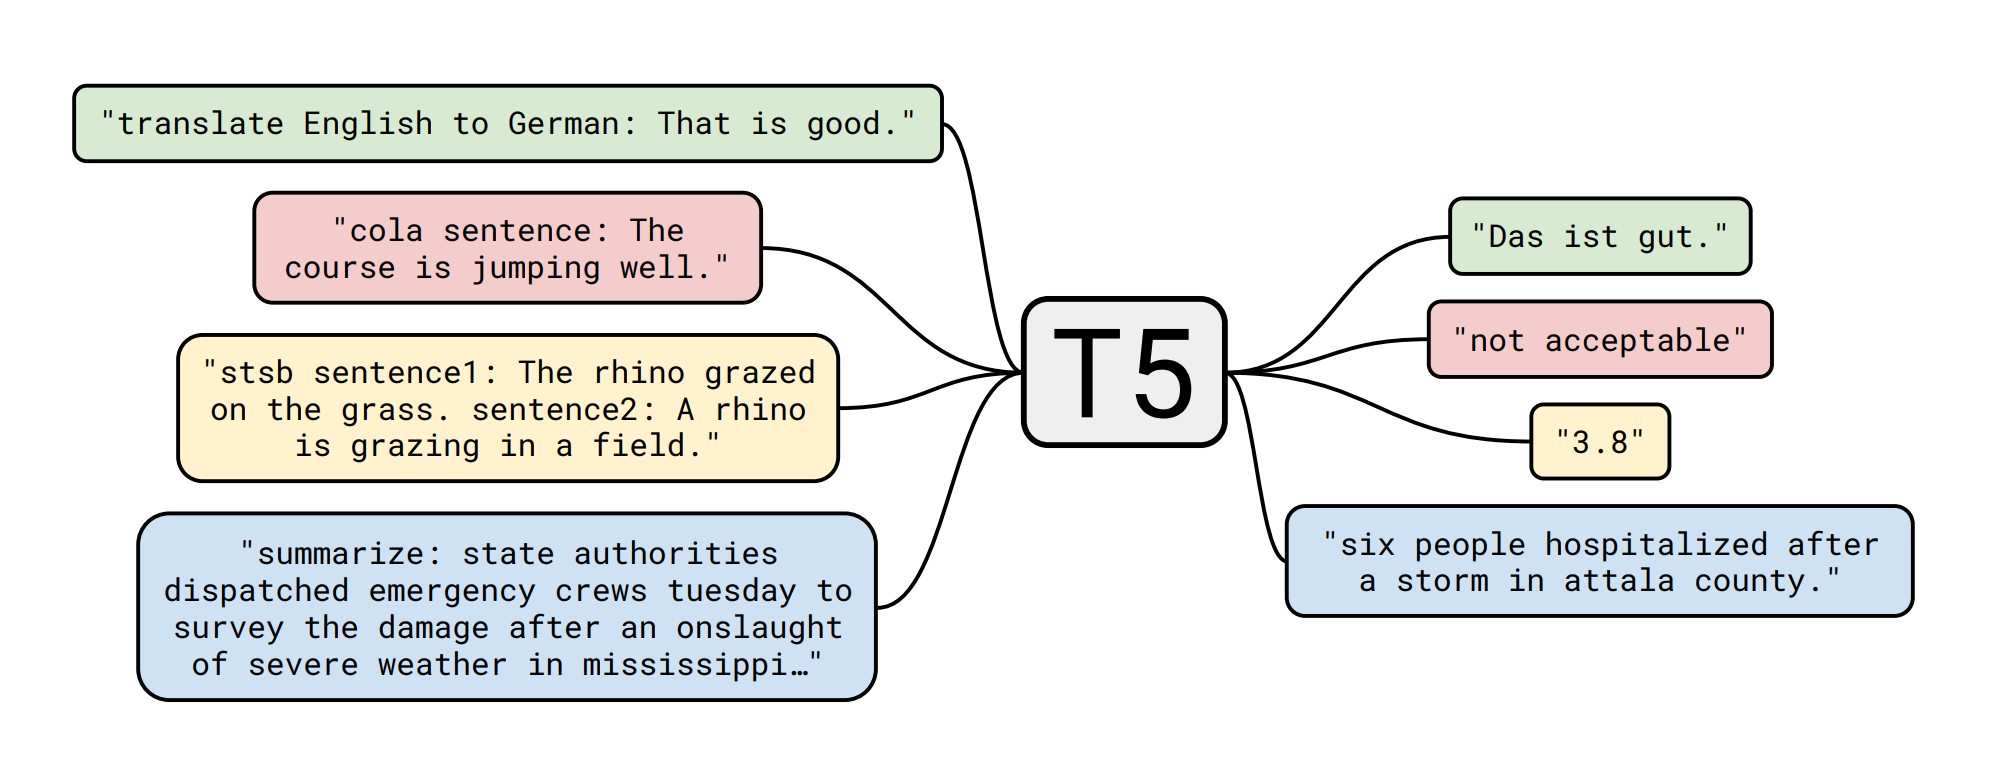

In [ ]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.2 MB/s eta 0:00:00


In [ ]:
!pip install datasets evaluate rouge_score

In [ ]:
!pip install --upgrade accelerate

## Load Billsum dataset


In [ ]:
from datasets import load_dataset

billsum = load_dataset("billsum", split="ca_test")

In [ ]:
billsum = billsum.train_test_split(test_size=0.2)

In [ ]:
billsum["train"][0]

{'text': 'The people of the State of California do enact as follows:\n\n\nSECTION 1.\n(a) The sum of six hundred forty-seven thousand four hundred forty-three dollars and thirty-two cents ($647,443.32) is hereby appropriated from the various funds specified in subdivision (b) to the Executive Officer of the California Victim Compensation and Government Claims Board for the payment of claims accepted by the board in accordance with the schedule set forth in subdivision (b).\n(b) Pursuant to subdivision (a), claims accepted by the California Victim Compensation and Government Claims Board shall be paid in accordance with the following schedule:\nTotal for Fund: General Fund (0001) ........................ $606,296.25\nTotal for Fund: Item 2660-001-0042\nBudget Act of 2016, Program 1835010 ........................ $47.31\nTotal for Fund: Item 2740-001-0044\nBudget Act of 2016, Program 2130 ........................ $966.22\nTotal for Fund: Item 4260-101-0001\nBudget Act of 2016, Program 39

## Preprocess


In [ ]:
from transformers import AutoTokenizer

checkpoint = "t5-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
prefix = "summarize: "


def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["text"]]
    model_inputs = tokenizer(inputs, max_length=2000, truncation=True)

    labels = tokenizer(text_target=examples["summary"], max_length=300, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_billsum = billsum.map(preprocess_function, batched=True)

Map:   0%|          | 0/989 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

## Evaluate

In [ ]:
import evaluate

rouge = evaluate.load("rouge")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

## Train

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_awesome_billsum_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=5,
    predict_with_generate=True,
    # fp16=True,
    # push_to_hub=True,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_billsum["train"],
    eval_dataset=tokenized_billsum["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.690600,1.691391,0.117200,0.069800,0.105400,0.105300,19.000000
2,1.799900,1.606972,0.120000,0.073500,0.108000,0.107800,19.000000
3,1.690700,1.566353,0.121100,0.075700,0.108800,0.108600,19.000000
4,1.603500,1.543810,0.120100,0.074300,0.107100,0.106900,19.000000


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.690600,1.691391,0.117200,0.069800,0.105400,0.105300,19.000000
2,1.799900,1.606972,0.120000,0.073500,0.108000,0.107800,19.000000
3,1.690700,1.566353,0.121100,0.075700,0.108800,0.108600,19.000000
4,1.603500,1.543810,0.120100,0.074300,0.107100,0.106900,19.000000
5,1.561700,1.540453,0.120200,0.074000,0.107200,0.107000,19.000000


TrainOutput(global_step=4945, training_loss=1.801549626457438, metrics={'train_runtime': 5389.2876, 'train_samples_per_second': 0.918, 'train_steps_per_second': 0.918, 'total_flos': 9954433633305600.0, 'train_loss': 1.801549626457438, 'epoch': 5.0})

In [ ]:
trainer.save_model("base-modelt5")

In [ ]:
import zipfile
import os
folder_path = '/content/base-modelt5'  

zip_file_path = '/content/base-modelt5.zip' 

with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

In [ ]:
from google.colab import files

files.download(zip_file_path)

## Summarize dari data review

In [ ]:
text = """nice clean room good bathroom toiletress valuable facility restaurant swimming pool excellent breakfast warmly staff definitely comeback next holiday bali hotel near everywhere room clean recommend budget hotel need improve breakfast taste affordable clean really great location heart kuta much spend hotel facility good value everything hotel awesome breakfast buffet eat room super bright nice full body mirror shower size good using mirror door staffs perfectly polite kind This is the last hotel for the last day holiday, although it's just the day I realized how close it is to Mcdy's and Xbucks's fav place and the souvenirs in front also have lots of meatballs that are very strategic, next time, the food is clean, friendly, good job room nice clean affordable price good air conditioner friendly staff perfect location downtown surely back booked twin standard room balcony 2 nights absolutely wonderful price unbeatable strategic location starbucks mcdonald diner 2 min walk pro tip coming seminyak area pick drop point mcdonald starbucks instead short walk save around r5k hotel well maintained clean cozy bedroom spotless bathroom nice shower upon entering room housekeeping might sprayed room freshener nice little touch pool great clean quite big 3 star hotel breakfast great options international local dishes eggs ordered separately scrambled eggs tasted horrible coffee good either also get one next door apart everything alright would much love stay thank the location is close to where the ac is cold, really comfortable only50 thousand rupiah get buffet breakfast wonderful staffs well cozy room 60an tv channels said yes back visit bali next time aircon works well bathroom hot water hotel perfect location main road sunset road surounded good restaurant like laota interior design hotel also good balcony swimming pool clean comfortable remote working ok good bagus with only 200 thousand a night you can stay in a clean, comfortable hotel in a strategic location best hotel solo traveller room clean breakfast superb good location onli check slow thanks back 27 got 2 rooms night reccomended hotel value money really cozy stay friendly staff good facilities nice environment affordable price amazing stay suitable for group tour, simple hotel, strategic location, cheap price, great breakfast, trm ksh fame hotel clean rooms nice design excellent staff especially rolly others staff very clean good location quick easy check check staffs helpful room comfortable clean need little bit maintenance limited choice breakfast back everything great complain anything great best location near sate babi near shops etc amazing see u fame located sunset road reach mcd krishna apotik minutes walking bad varieties breakfast menu strategic location fast internet food bit bland nice things improved restaurants public facilities pools cleanly presented friendly staff nice hotel great place room small good hotel good location value price clean room however bit smelly lots food surronding one cockroach room stay time worth money even though bit disappointed breakfast becuase news pay want eggs breakfast thought 4 nights stay worth becuase rate bit cheaper time top markotop nice place room bit small ok staying comparable price main road beside mall galeria bali many stores along way hotel good location near beach city got everything around hotel nice price nice staff paid 24including buffet breakfast top notch huge variety fresh fruit pancakes true hit room devine tea coffee great excellent hotel regret book many nights 00 round easy to reach places close to tourist attractions everything great good place class friendly staff recommed solo traveller family traveller everything great worth hotel class affordable hotel leasure breakfast room overall service okay good value money location drive motorbike scooter cheap good clean overall good everything good minus point toiletries surely come back recomended purposes nice room nice place service ok breakfast worth room bad many small cockroaches need worry car parking every time return hotel space limited none staff charge helping makes think twice coming back great would like stay clean hotel nearby road noisy bcoz hear car bike way late need light lobby restaurant swimming pool look need maintance food restaurant taste ok service staff restaurant helpul concern abt orders food happy love hotel food good nice great design rooms hotel comment stayed fame hotel night super satisfied stay check quick welcome drink room clean swimming pool looked nice however get swim time breakfast poor possible find something get going overall would super recommend idea fame hotel super unique little bit budget owner potential absolutely memorable amazing worthy weekend 220k double bed room room rather small hair dryer upon request reception breakfast nothing special limited choice good things hotel strategic location near mcdonald starbucks within walking distance good value money wish would provide list available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city good place stay back decent nice room good location next restaurans everage good good value near many eating places fancy clean ac works spend 2 night silent day great much hotel coz pool closed day overall room clean staying 2 person get amenities one slipper tooth brush housekeeping open room without excuse bright clean rooms hollywierd themes great place creative e digital nomad get ideas bright interior design rooms allows higher frequency thought occur especially need imagination hotel maintenance minor entrance room door difficult open towel time replace schedule clean room available unless request front office bad well breakfast nothing much eat drink aircon broken fell hard aircon water floor worth price arrived late pm dec 29 hotel parking lot full staff security help us car receptionist busy front desk wait 20minutes get park car another car experienced thing like us waiting parking lot one help parked car staff helped us luggage drag baggage ourself fine except traveled elderly really need help least checked expected good night sleep air con leaking water wet floor called engineering twice someone came fixed aircon after0 minutes aircon leaking called staff came fixed untill stopped leaking sink toilet also leaky overall hotel old needed renovated refresh hotel dirty lot cockroach room mother room hotel really recommended stay got old broken pillow cases towels breakfast bad think put kilogram salt every food family eat allowed borrow dining table dinner except bought something want buy food withkg salt restaurant many cats around stink first slippery call fo ask said need buy that0k said okey bring money suppose facility hotel shower cap room infested smal roaches minutes stay room already killed 5 cockroaches desk roaches appeared shower drain following day bed sheet oil stain room fridge coffee tea sugar provided hotel good location though good night stay recommended long stay hotel"""



In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="base-modelt5")
summarizer("summarize : "+text)

Token indices sequence length is longer than the specified maximum sequence length for this model (1343 > 512). Running this sequence through the model will result in indexing errors


[{'summary_text': 'ac works in a strategic location near mcdonald starbucks within walking distance good value hotel in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location near mcdonald starbucks within walking distance ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location ac works in a strategic location'}]

In [ ]:
summarizer = pipeline("summarization", model="base-modelt5")
summarizer(text)

Token indices sequence length is longer than the specified maximum sequence length for this model (1340 > 512). Running this sequence through the model will result in indexing errors


[{'summary_text': 'ac works in a strategic location near mcdonald starbucks within walking distance good value money wish to provide list of available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city good value money wish to provide list of available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city good value money wish to provide list of available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff'}]

# Summarize Review

In [ ]:
cd /content/drive/MyDrive/Tugas/NLP/Proyek UAS

/content/drive/MyDrive/Tugas/NLP/Proyek UAS


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Tugas/NLP/Proyek UAS/base-modelt5.zip"  
extract_path = "/content/drive/MyDrive/Tugas/NLP/Proyek UAS/base-modelt5"  

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ekstraksi selesai.")


Ekstraksi selesai.


In [ ]:
df = pd.read_csv("Translated Review.csv",index_col=0)
df

,title,text
0,Legian Paradiso Hotel,beautiful balinese hotel excellent staff great...
1,Fame Hotel Sunset Road Kuta,nice clean room good bathroom toiletress valua...
2,The Grand Bali Nusa Dua Resort,slightly dated hotel great value money pool lo...
3,Taman Harum Cottages Hotel,hidden away behind restaurant carpark taman ha...
4,Umadhatu Village Outbound Resort,really enjoyed stay villa stayed well maintain...
...,...,...
69,TS Suites Seminyak,booked two rooms stayed 4n buffet breakfast co...
70,Harper Kuta Hotel,stays recomend friends stays 4 nights getaway ...
71,Yarama Cottages,like yoga barn place 2mins away place quite ev...
72,Mercure Bali Legian Hotel,pros love room spacious clean love bunk bed ro...


In [ ]:
summarizer = pipeline("summarization", model="base-modelt5")
summarize_result = []

i = 0
for text in df["text"]:
    result = summarizer(text)
    print(i+1,df["title"][i],result)
    i+=1
    summarize_result.append(result)


Token indices sequence length is longer than the specified maximum sequence length for this model (5976 > 512). Running this sequence through the model will result in indexing errors


1 Legian Paradiso Hotel [{'summary_text': 'a hotel in a secluded location in the heart of the city of kuta, a popular tourist destination in the south of the country, this hotel is located in a quiet area of the city, just a few minutes from the airport. The hotel is located in a quiet area of the city, just a few minutes from the airport, and is located in a quiet area of the city. The hotel is located in a quiet area of the city, just a few minutes from the airport. The hotel is located in a quiet area, the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a great location for the hotel is a'}]
2 Fame Hotel Sunset Road Kuta [{'summary_text': 'ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, ac, 

Hasilnya aneh, banyak frasa yang terulang-ulang, bahkan untuk review Flowe Bud Bungalow (42) isinya "ac ac ac..." yang tidak bisa dimengerti.Karena hasilnya aneh kami mencoba melakukan Summarize News.

In [ ]:
news = """Made up of more than 1,000 islands spread over 90,000 square kilometers, Maldives is a country like no other.
The majority of the nation’s 160-plus resorts sit on individual islands, many of which are accessed by float plane from capital Male’s Velana International Airport.
A private island paradise in a country that’s 99% water, famed for having some of the world’s most stunning coastal scenery? Not a tough sell for most travelers.
But there are downsides. Being on a remote island can limit dining options. And opportunities to learn about Maldives’ fascinating history and the challenges it faces as the world’s lowest-lying nation are in short supply.
That’s where CROSSROADS Maldives comes in. Just a 15-minute air-conditioned speedboat ride from the international airport, it’s the country’s first multi-island leisure and lifestyle destination, designed to target both international tourists and locals looking for a day escape from the capital.
Arriving guests pull into a picturesque 30-berth marina – where they’re likely to spot a superyacht or two – that connects to an open-air dining and retail zone. From there, they’re shuttled via electric buggy to one of two resorts – the SAii Lagoon Maldives, Curio Collection by Hilton or the Hard Rock Hotel Maldives – which occupy their own individual islands, all connected by narrow bridges. Daytrippers can head for the SAii Beach Club, a separate venue with its own private beach and dining options."""


In [ ]:
summarizer(news)

[{'summary_text': 'CROSSROADS Maldives is the country’s first multi-island leisure and lifestyle destination, designed to target both international tourists and locals looking for a day escape from the capital Male’s Velana International Airport . the country’s first multi-island leisure and lifestyle destination, designed to target both international tourists and locals looking for a day escape from the capital Male’s Velana International Airport .'}]

In [ ]:
len("CROSSROADS Maldives is the country’s first multi-island leisure and lifestyle destination, designed to target both international tourists and locals looking for a day escape from the capital Male’s Velana International Airport . the country’s first multi-island leisure and lifestyle destination, designed to target both international tourists and locals looking for a day escape from the capital Male’s Velana International Airport ".split())

60

Model kami bisa melakukan summarize news dengan baik. Kami curiga masalahnya karena inputan sebelumnya terlalu panjang jadi mencoba summary review lagi dengan inputan kata lebih sedikit yaitu 830 kata.

In [ ]:
text = "nice clean room good bathroom toiletress valuable facility restaurant swimming pool excellent breakfast warmly staff definitely comeback next holiday bali hotel near everywhere room clean recommend budget hotel need improve breakfast taste affordable clean really great location heart kuta much spend hotel facility good value everything hotel awesome breakfast buffet eat room super bright nice full body mirror shower size good using mirror door staffs perfectly polite kind This is the last hotel for the last day holiday, although it's just the day I realized how close it is to Mcdy's and Xbucks's fav place and the souvenirs in front also have lots of meatballs that are very strategic, next time, the food is clean, friendly, good job room nice clean affordable price good air conditioner friendly staff perfect location downtown surely back booked twin standard room balcony 2 nights absolutely wonderful price unbeatable strategic location starbucks mcdonald diner 2 min walk pro tip coming seminyak area pick drop point mcdonald starbucks instead short walk save around r5k hotel well maintained clean cozy bedroom spotless bathroom nice shower upon entering room housekeeping might sprayed room freshener nice little touch pool great clean quite big 3 star hotel breakfast great options international local dishes eggs ordered separately scrambled eggs tasted horrible coffee good either also get one next door apart everything alright would much love stay thank the location is close to where the ac is cold, really comfortable only50 thousand rupiah get buffet breakfast wonderful staffs well cozy room 60an tv channels said yes back visit bali next time aircon works well bathroom hot water hotel perfect location main road sunset road surounded good restaurant like laota interior design hotel also good balcony swimming pool clean comfortable remote working ok good bagus with only 200 thousand a night you can stay in a clean, comfortable hotel in a strategic location best hotel solo traveller room clean breakfast superb good location onli check slow thanks back 27 got 2 rooms night reccomended hotel value money really cozy stay friendly staff good facilities nice environment affordable price amazing stay suitable for group tour, simple hotel, strategic location, cheap price, great breakfast, trm ksh fame hotel clean rooms nice design excellent staff especially rolly others staff very clean good location quick easy check check staffs helpful room comfortable clean need little bit maintenance limited choice breakfast back everything great complain anything great best location near sate babi near shops etc amazing see u fame located sunset road reach mcd krishna apotik minutes walking bad varieties breakfast menu strategic location fast internet food bit bland nice things improved restaurants public facilities pools cleanly presented friendly staff nice hotel great place room small good hotel good location value price clean room however bit smelly lots food surronding one cockroach room stay time worth money even though bit disappointed breakfast becuase news pay want eggs breakfast thought 4 nights stay worth becuase rate bit cheaper time top markotop nice place room bit small ok staying comparable price main road beside mall galeria bali many stores along way hotel good location near beach city got everything around hotel nice price nice staff paid 24including buffet breakfast top notch huge variety fresh fruit pancakes true hit room devine tea coffee great excellent hotel regret book many nights 00 round easy to reach places close to tourist attractions everything great good place class friendly staff recommed solo traveller family traveller everything great worth hotel class affordable hotel leasure breakfast room overall service okay good value money location drive motorbike scooter cheap good clean overall good everything good minus point toiletries surely come back recomended purposes nice room nice place service ok breakfast worth room bad many small cockroaches need worry car parking every time return hotel space limited none staff charge helping makes think twice coming back great would like stay clean hotel nearby road noisy bcoz hear car bike way late need light lobby restaurant swimming pool look need maintance food restaurant taste ok service staff restaurant helpul concern abt orders food happy love hotel food good nice great design rooms hotel comment stayed fame hotel night super satisfied stay check quick welcome drink room clean swimming pool looked nice however get swim time breakfast poor possible find something get going overall would super recommend idea fame hotel super unique little bit budget owner potential absolutely memorable amazing worthy weekend 220k double bed room room rather small hair dryer upon request reception breakfast nothing special limited choice good things hotel strategic location near mcdonald starbucks within walking distance good value money wish would provide list available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city good place stay back decent nice room good location next restaurans everage good good value near many eating places fancy clean ac works spend 2 night silent day great much hotel coz pool closed day overall room clean staying 2"
summarizer(text)

[{'summary_text': 'ac works spend 2 nights silent day great much hotel coz pool closed day overall room clean staying 2 nights silent day great place stay back decent hotel in a strategic location near mcdonald starbucks within walking distance good value money wish would provide list available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city good value money wish would provide list available tv channels prevent endless channel changing find ones need recommended work hotel hi speed wifi warm friendly staff location strategic middle city'}]

Hasilnya baik dan tidak ada frasa berulang-ulang seperti sebelumnya